In [1]:
import pandas as pd
import os
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
from pyspark.sql.functions import col, skewness, kurtosis

In [2]:
pwd

'C:\\Users\\Mahek'

In [3]:
df_credit = pd.read_csv(r"C:\Users\Mahek\labAssignmentData\german_credit_data.csv")
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df_credit.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Text(0, 0.5, 'number of people')

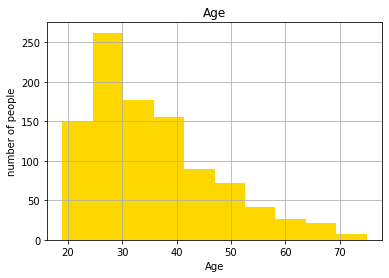

In [5]:
df_credit.hist(column='Age', histtype='bar', color='gold')
plt.xlabel('Age')
plt.ylabel('number of people')

In [6]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None


In [7]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24    

In [11]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    
    box = sns.violinplot(x=x,y=y, hue=h, data=df_credit)
    
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

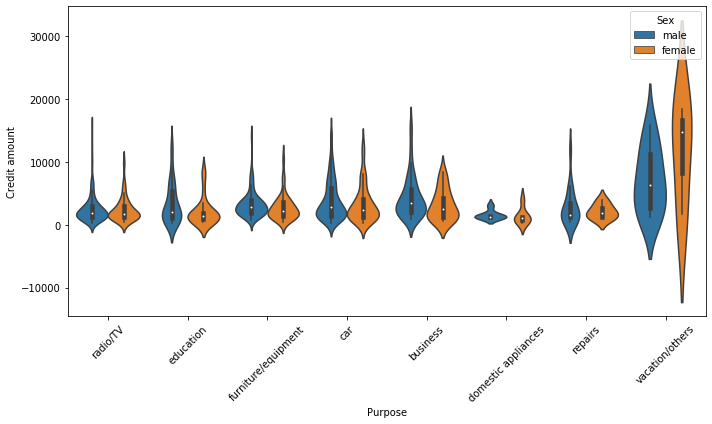

In [12]:
boxes("Purpose","Credit amount","Sex")


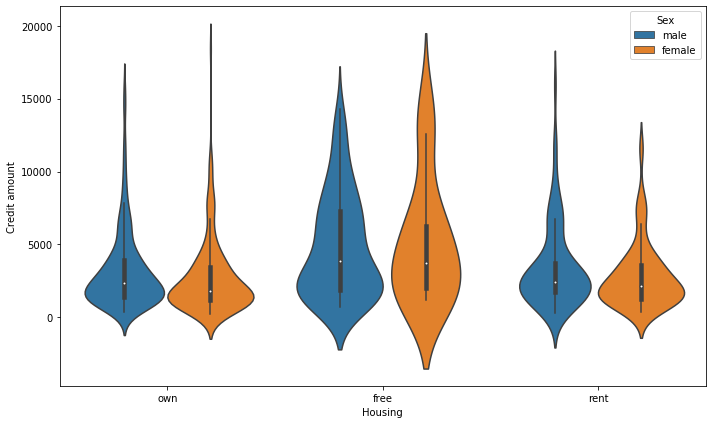

In [13]:
boxes("Housing","Credit amount","Sex",r=0)


<Figure size 432x288 with 0 Axes>

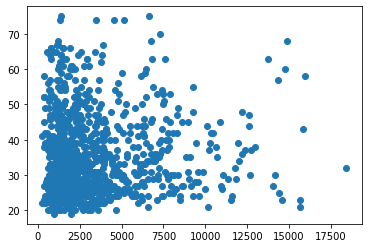

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(df_credit['Credit amount'],df_credit["Age"])
plt.figure()

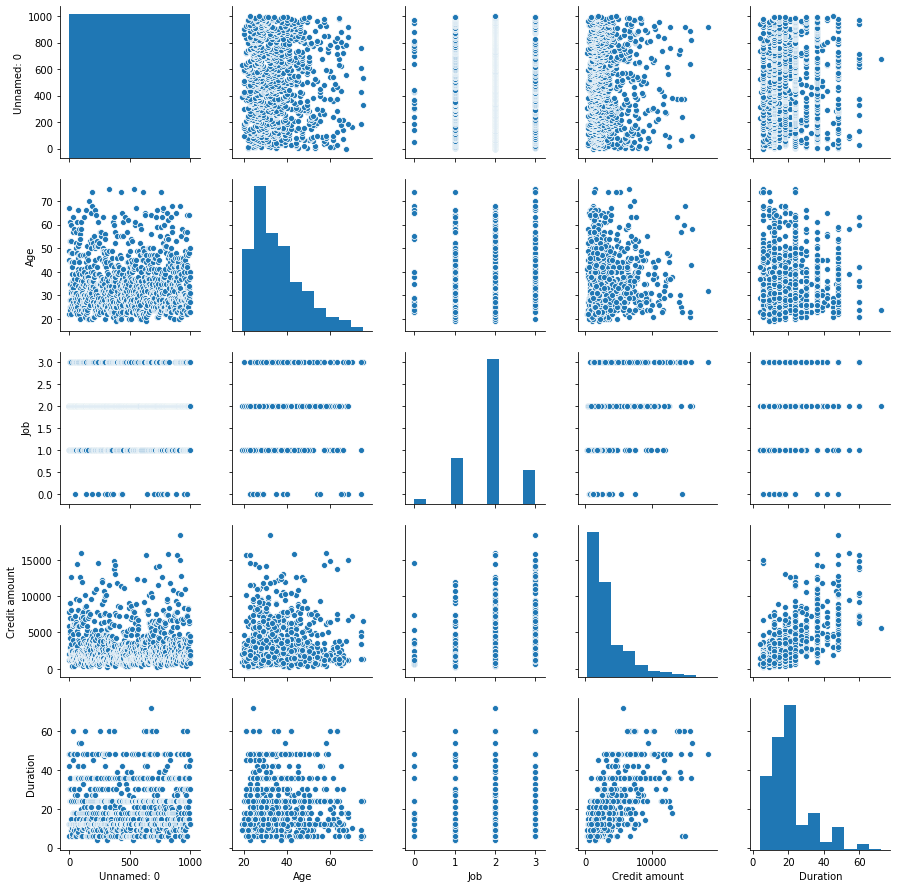

In [21]:
sns.pairplot(df_credit)

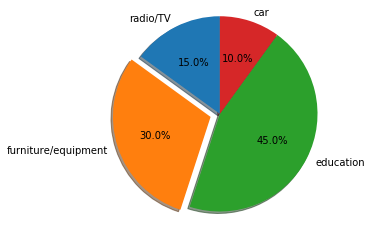

In [44]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'radio/TV', 'furniture/equipment', 'education', 'car'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

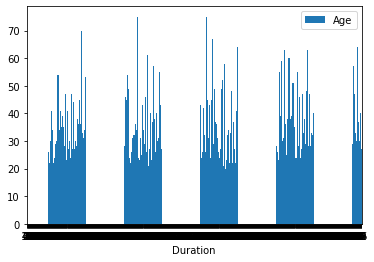

In [50]:
ax = df_credit.plot.bar(x='Duration', y='Age', rot=0)

Text(3, -100, 'Highly Skilled')

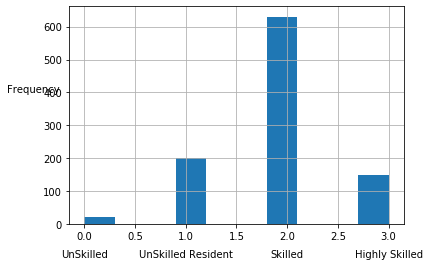

In [51]:
fig = df_credit["Job"].hist()
fig.text(-0.5, 400, 'Frequency', ha='center')
fig.text(0, -100, 'UnSkilled', ha='center')
fig.text(1, -100, 'UnSkilled Resident', ha='center')
fig.text(2, -100, 'Skilled', ha='center')
fig.text(3, -100, 'Highly Skilled', ha='center')

In [55]:
pd.crosstab(df_credit.Age, df_credit.Job)

Job,0,1,2,3
Age,,,,
19,0,1,1,0
20,0,1,12,1
21,0,3,11,0
22,0,4,23,0
23,3,13,30,2
24,1,11,31,1
25,1,9,30,1
26,2,7,36,5
27,2,9,35,5
